<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.730834,95.159203,97.949407,51.788878,-0.003648,316.624674,316.627362,-0.002688
1,0.0,1.0,96.795764,28.253383,52.081812,98.656162,0.006514,285.793635,285.788318,0.005316
2,0.0,2.0,22.614460,51.692101,87.251009,78.529902,-0.001329,250.086143,250.088278,-0.002136
3,0.0,3.0,98.729282,92.091396,72.921193,22.738384,-0.000362,296.479893,296.478714,0.001178
4,0.0,4.0,99.859376,77.179621,24.648078,51.695859,0.000104,263.383037,263.382713,0.000324
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.752077,58.625863,94.538706,49.675304,0.003540,299.595490,299.591438,0.004052
249996,999.0,246.0,25.176716,94.244620,78.298363,50.993399,0.001180,258.714277,258.712472,0.001806
249997,999.0,247.0,93.499405,67.187797,79.355696,94.341369,0.001312,344.385578,344.384035,0.001543
249998,999.0,248.0,31.549582,94.931402,93.058601,24.568734,-0.001325,254.106993,254.107564,-0.000570


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.730834  95.159203  97.949407  51.788878 -0.003648  316.624674   
      1.0    96.795764  28.253383  52.081812  98.656162  0.006514  285.793635   
      2.0    22.614460  51.692101  87.251009  78.529902 -0.001329  250.086143   
      3.0    98.729282  92.091396  72.921193  22.738384 -0.000362  296.479893   
      4.0    99.859376  77.179621  24.648078  51.695859  0.000104  263.383037   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  86.752077  58.625863  94.538706  49.675304  0.003540  299.595490   
      246.0  25.176716  94.244620  78.298363  50.993399  0.001180  258.714277   
      247.0  93.499405  67.187797  79.355696  94.341369  0.001312  344.385578   
      248.0  31.549582  94.931402  93.058601  24.568734 -0.001325  254.106993   
      249.0  24.684970  29.535959  68.411479  28.775262 -0.002731  161.404939   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    316.627362 -0.002688  
      1.0    285.788318  0.005316  
      2.0    250.088278 -0.002136  
      3.0    296.478714  0.001178  
      4.0    263.382713  0.000324  
...                 ...       ...  
999.0 245.0  299.591438  0.004052  
      246.0  258.712472  0.001806  
      247.0  344.384035  0.001543  
      248.0  254.107564 -0.000570  
      249.0  161.406856 -0.001918  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.730834  95.159203  97.949407  51.788878 -0.003648  316.624674   
      1.0    96.795764  28.253383  52.081812  98.656162  0.006514  285.793635   
      2.0    22.614460  51.692101  87.251009  78.529902 -0.001329  250.086143   
      3.0    98.729282  92.091396  72.921193  22.738384 -0.000362  296.479893   
      4.0    99.859376  77.179621  24.648078  51.695859  0.000104  263.383037   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  86.752077  58.625863  94.538706  49.675304  0.003540  299.595490   
      246.0  25.176716  94.244620  78.298363  50.993399  0.001180  258.714277   
      247.0  93.499405  67.187797  79.355696  94.341369  0.001312  344.385578   
      248.0  31.549582  94.931402  93.058601  24.568734 -0.001325  254.106993   
      249.0  24.684970  29.535959  68.411479  28.775262 -0.002731  161.404939   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    316.627362 -0.002688  
      1.0    285.788318  0.005316  
      2.0    250.088278 -0.002136  
      3.0    296.478714  0.001178  
      4.0    263.382713  0.000324  
...                 ...       ...  
999.0 245.0  299.591438  0.004052  
      246.0  258.712472  0.001806  
      247.0  344.384035  0.001543  
      248.0  254.107564 -0.000570  
      249.0  161.406856 -0.001918  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,61.730834,95.159203,97.949407,51.788878,-0.003648,316.624674,316.627362,-0.002688
1,0.0,1.0,96.795764,28.253383,52.081812,98.656162,0.006514,285.793635,285.788318,0.005316
2,0.0,2.0,22.614460,51.692101,87.251009,78.529902,-0.001329,250.086143,250.088278,-0.002136
3,0.0,3.0,98.729282,92.091396,72.921193,22.738384,-0.000362,296.479893,296.478714,0.001178
4,0.0,4.0,99.859376,77.179621,24.648078,51.695859,0.000104,263.383037,263.382713,0.000324
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.752077,58.625863,94.538706,49.675304,0.003540,299.595490,299.591438,0.004052
249996,999.0,246.0,25.176716,94.244620,78.298363,50.993399,0.001180,258.714277,258.712472,0.001806
249997,999.0,247.0,93.499405,67.187797,79.355696,94.341369,0.001312,344.385578,344.384035,0.001543
249998,999.0,248.0,31.549582,94.931402,93.058601,24.568734,-0.001325,254.106993,254.107564,-0.000570


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    61.730834  95.159203  97.949407  51.788878 -0.003648  316.624674   
      1.0    96.795764  28.253383  52.081812  98.656162  0.006514  285.793635   
      2.0    22.614460  51.692101  87.251009  78.529902 -0.001329  250.086143   
      3.0    98.729282  92.091396  72.921193  22.738384 -0.000362  296.479893   
      4.0    99.859376  77.179621  24.648078  51.695859  0.000104  263.383037   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  86.752077  58.625863  94.538706  49.675304  0.003540  299.595490   
      246.0  25.176716  94.244620  78.298363  50.993399  0.001180  258.714277   
      247.0  93.499405  67.187797  79.355696  94.341369  0.001312  344.385578   
      248.0  31.549582  94.931402  93.058601  24.568734 -0.001325  254.106993   
      249.0  24.684970  29.535959  68.411479  28.775262 -0.002731  161.404939   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    316.627362 -0.002688  
      1.0    285.788318  0.005316  
      2.0    250.088278 -0.002136  
      3.0    296.478714  0.001178  
      4.0    263.382713  0.000324  
...                 ...       ...  
999.0 245.0  299.591438  0.004052  
      246.0  258.712472  0.001806  
      247.0  344.384035  0.001543  
      248.0  254.107564 -0.000570  
      249.0  161.406856 -0.001918  

[250000 rows x 8 columns]

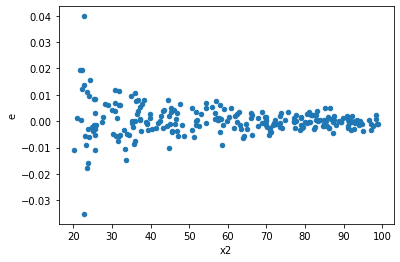

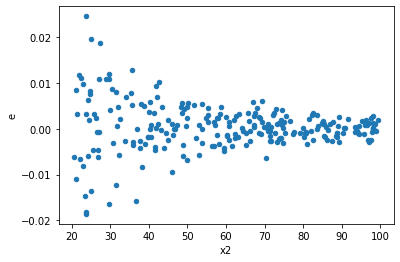

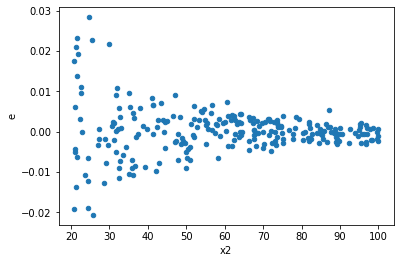

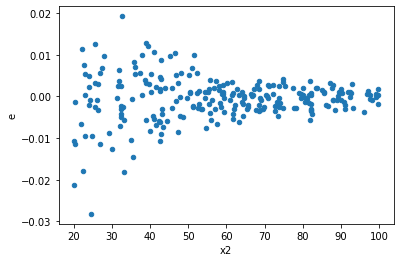

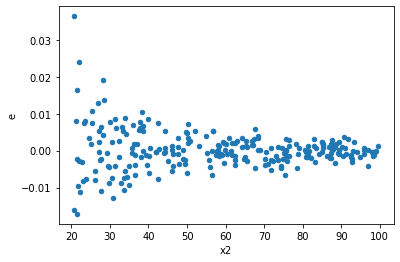

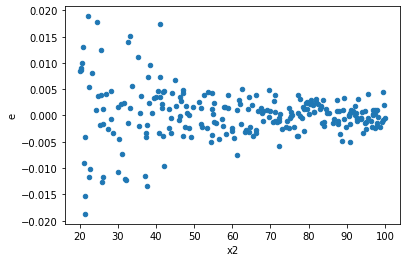

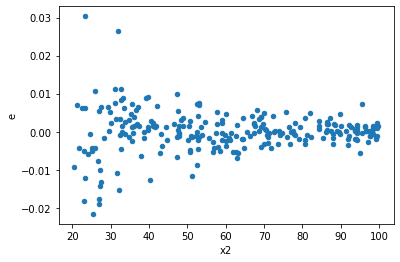

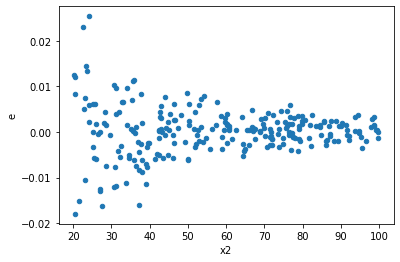

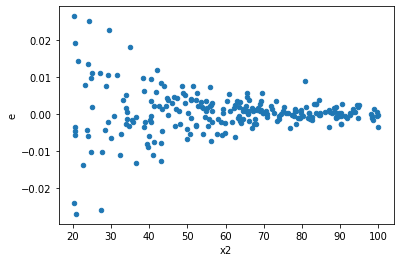

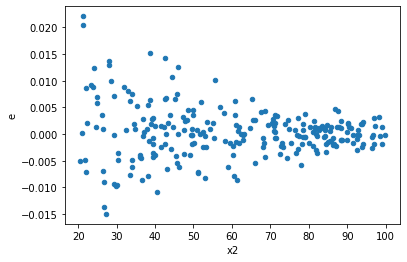

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,128.0,114.0,0.0008246824059083324,0.007432025099235727,6.442831296158847e-06,6.51932026248748e-05,10.118719492739528,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
2.0,111.0,131.0,0.0036944297894568705,0.004811011013960997,3.32831512563682e-05,3.67252749157328e-05,1.1034194037953664,0.5864674956172102,0.7067662521913949,0.2932337478086051,Reject001=1 : Homoscedasticity
3.0,122.0,120.0,0.00289452242323769,0.003967800542315925,2.3725593633095823e-05,3.306500451929938e-05,1.3936428748899932,0.06933004810664567,0.9653349759466772,0.034665024053322835,Reject001=1 : Homoscedasticity
5.0,129.0,113.0,0.0006071333704130621,0.0052610805986260875,4.706460235760172e-06,4.655823538607157e-05,9.892410230584183,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
6.0,117.0,125.0,0.0007322137888283512,0.006768114173636647,6.258237511353429e-06,5.4144913389093176e-05,8.65178307644377,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
7.0,117.0,125.0,0.0024641477053974903,0.004587979534874348,2.106109149912385e-05,3.670383627899478e-05,1.7427319130407688,0.0023739604332477793,0.9988130197833761,0.0011869802166238896,Reject001=0 : Heteroscedasticity
8.0,111.0,131.0,0.0029976349014534127,0.005665850608957202,2.7005719832913626e-05,4.325076800730689e-05,1.6015410170475948,0.009709575693947814,0.9951452121530261,0.004854787846973907,Reject001=0 : Heteroscedasticity
9.0,129.0,113.0,0.0029221653705845643,0.0030360920073558132,2.2652444733213678e-05,2.6868070861555868e-05,1.1861002720894454,0.35321756320972186,0.8233912183951391,0.17660878160486093,Reject001=1 : Homoscedasticity
11.0,119.0,123.0,0.0006111571020548657,0.005479559297168633,5.135773966847611e-06,4.454926257860677e-05,8.674303594001733,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,114.0,0.0008246824059083324,0.007432025099235727,6.442831296158847e-06,6.51932026248748e-05,10.118719492739528,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,123.0,119.0,0.0046626507879886986,0.002063008633279553,3.790772998364795e-05,1.7336207002349182e-05,0.4573264347358021,2.1326998293299963e-05,Reject001=0 : Heteroscedasticity
2.0,111.0,131.0,0.0036944297894568705,0.004811011013960997,3.32831512563682e-05,3.67252749157328e-05,1.1034194037953664,0.5864674956172102,Reject001=1 : Homoscedasticity
3.0,122.0,120.0,0.00289452242323769,0.003967800542315925,2.3725593633095823e-05,3.306500451929938e-05,1.3936428748899932,0.06933004810664567,Reject001=1 : Homoscedasticity
4.0,118.0,124.0,0.004449263564832725,0.0026926720928208423,3.770562343078581e-05,2.1715097522748728e-05,0.575911377320414,0.0026940247304140905,Reject001=0 : Heteroscedasticity
5.0,129.0,113.0,0.0006071333704130621,0.0052610805986260875,4.706460235760172e-06,4.655823538607157e-05,9.892410230584183,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,117.0,125.0,0.0007322137888283512,0.006768114173636647,6.258237511353429e-06,5.4144913389093176e-05,8.65178307644377,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,117.0,125.0,0.0024641477053974903,0.004587979534874348,2.106109149912385e-05,3.670383627899478e-05,1.7427319130407688,0.0023739604332477793,Reject001=0 : Heteroscedasticity
8.0,111.0,131.0,0.0029976349014534127,0.005665850608957202,2.7005719832913626e-05,4.325076800730689e-05,1.6015410170475948,0.009709575693947814,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    531
Reject001=1 : Homoscedasticity      469
Name: Result_test, dtype: int64